In [1]:
import torch
import chemprop
import pandas as pd
from chemprop.train.predict import predict
from chemprop.models.model import MoleculeModel
from chemprop.data import MoleculeDataset
from chemprop.train import load_data,load_model,make_predictions
from chemprop.args import TrainArgs,PredictArgs
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

In [2]:
def plot_parity(y_true, y_pred, y_pred_unc=None):

    axmin = min(min(y_true), min(y_pred)) - 0.1*(max(y_true)-min(y_true))
    axmax = max(max(y_true), max(y_pred)) + 0.1*(max(y_true)-min(y_true))

    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    plt.plot([axmin, axmax], [axmin, axmax], '--k')

    plt.errorbar(y_true, y_pred, yerr=y_pred_unc, linewidth=0, marker='o', markeredgecolor='w', alpha=1, elinewidth=1)

    plt.xlim((axmin, axmax))
    plt.ylim((axmin, axmax))

    ax = plt.gca()
    ax.set_aspect('equal')

    at = AnchoredText(
    f"MAE = {mae:.2f}\nRMSE = {rmse:.2f}", prop=dict(size=10), frameon=True, loc='upper left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)

    plt.xlabel('True')
    plt.ylabel('Chemprop Predicted')

    plt.show()

    return

In [6]:
# 不使用描述符进行训练
arguments = [
    '--test_path', 'C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/smiles_tm_240227-test.csv',
    #'--features_path', 'C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0116/features_240116.csv',
    #'--features_generator','morgan',
    '--preds_path', 'C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/predict_full_base-test.csv',
    '--checkpoint_dir', 'C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/tm_base_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)

model_objects = chemprop.train.load_model(args=args)

preds = chemprop.train.make_predictions(args=args,  model_objects=model_objects)

Loading training args
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Setting molecule featurization parameters to default.
Loading data


12it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Validating SMILES
Test size = 12


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.36s/it]

Saving predictions to C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/predict_full_base-test.csv
Elapsed time = 0:00:08


In [4]:
df4 = pd.read_csv('C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/predict_full_base.csv')
plot_parity(df.iloc[:,1], df4.iloc[:,1])

NameError: name 'df' is not defined

In [7]:
# 使用morgan指纹进行训练
arguments = [
    '--test_path', 'C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/smiles_tm_240119.csv',
    '--features_generator', 'morgan',
    '--preds_path', 'C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/predict_full_morgan.csv',
    '--checkpoint_dir', 'C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/tm_morgan_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)

model_objects = chemprop.train.load_model(args=args)

preds = chemprop.train.make_predictions(args=args,  model_objects=model_objects)

Loading training args
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Setting molecule featurization parameters to default.
Loading data


29712it [00:00, 92576.67it/s]
100%|██████████████████████████████████████████████████████████████████████████| 29712/29712 [00:11<00:00, 2594.98it/s]


Validating SMILES
Test size = 29,712


 80%|████████████████████████████████████████████████████████████████▎               | 478/595 [02:52<00:09, 12.92it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [03:03<00:00, 183.57s/it]


Saving predictions to C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/predict_full_morgan.csv
Elapsed time = 0:03:20


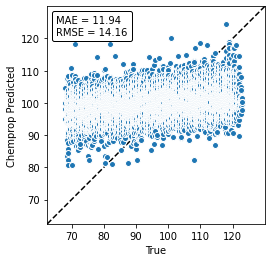

In [16]:
df = pd.read_csv('C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/smiles_tm_240119.csv')
df1 = pd.read_csv('C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/predict_full_morgan.csv')
plot_parity(df.iloc[:,1], df1.iloc[:,1])

In [10]:
# 使用自定义GIPF描述符进行训练
arguments = [
    '--test_path', 'C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/smiles_tm_240119.csv',
    '--features_path', 'C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/features_240119.csv',
    '--preds_path', 'C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/predict_full_GIPF.csv',
    '--checkpoint_dir', 'C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/tm_GIPF_desc_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)

model_objects = chemprop.train.load_model(args=args)

preds = chemprop.train.make_predictions(args=args,  model_objects=model_objects)

Loading training args
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Setting molecule featurization parameters to default.
Loading data


29712it [00:00, 82319.65it/s]
100%|█████████████████████████████████████████████████████████████████████████| 29712/29712 [00:00<00:00, 58917.33it/s]


Validating SMILES
Test size = 29,712


 83%|██████████████████████████████████████████████████████████████████▏             | 492/595 [01:18<00:07, 12.95it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:26<00:00, 86.75s/it]


Saving predictions to C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/predict_full_GIPF.csv
Elapsed time = 0:01:28


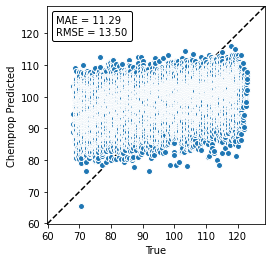

In [11]:
df2 = pd.read_csv('C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/predict_full_GIPF.csv')
plot_parity(df.iloc[:,1], df2.iloc[:,1])

In [12]:
# 使用联合描述符进行训练
arguments = [
    '--test_path', 'C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/smiles_tm_240119.csv',
    '--features_path', 'C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/features_240119.csv',
    '--features_generator','morgan',
    '--preds_path', 'C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/predict_full_comb.csv',
    '--checkpoint_dir', 'C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/tm_comb_desc_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)

model_objects = chemprop.train.load_model(args=args)

preds = chemprop.train.make_predictions(args=args,  model_objects=model_objects)

Loading training args
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Setting molecule featurization parameters to default.
Loading data


29712it [00:00, 86107.03it/s] 
100%|██████████████████████████████████████████████████████████████████████████| 29712/29712 [00:11<00:00, 2516.47it/s]


Validating SMILES
Test size = 29,712


 82%|█████████████████████████████████████████████████████████████████▋              | 489/595 [02:37<00:08, 12.63it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [02:47<00:00, 167.64s/it]


Saving predictions to C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/predict_full_comb.csv
Elapsed time = 0:03:06


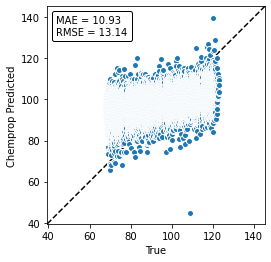

In [13]:
df3 = pd.read_csv('C:/Users/CP/Desktop/work/cp/30k_melting_cast/model_test_parameter_0119/predict_full_comb.csv')
plot_parity(df.iloc[:,1], df3.iloc[:,1])